In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

income = pd.read_excel('../data/raw/income.xlsx')

income = income.iloc[585:1047,[0,1,22,23]]

income.columns = ['SA2_code','SA2_name','2014','2015']

income

,SA2_code,SA2_name,2014,2015
585,201011001,Alfredton,56374,57747
586,201011002,Ballarat,67217,72754
587,201011003,Ballarat - North,53017,54660
588,201011004,Ballarat - South,45473,46143
589,201011005,Buninyong,58011,58292
...,...,...,...,...
1042,217031476,Otway,40640,42426
1043,217041477,Moyne - East,48627,47031
1044,217041478,Moyne - West,48280,50307
1045,217041479,Warrnambool - North,50513,50939


In [50]:
postcode_SA2 = pd.read_csv('../data/raw/postcode_SA2.csv')

postcode_SA2 = postcode_SA2[['POSTCODE', 'SA2_MAINCODE_2011', 'SA2_NAME_2011']]

postcode_SA2 = postcode_SA2.rename(columns={'POSTCODE' : 'Postcode', 'SA2_MAINCODE_2011' : 'SA2_code', 'SA2_NAME_2011' : 'SA2_name'})

postcode_SA2 = postcode_SA2.iloc[1763:3207]

income_postcode = pd.merge(postcode_SA2, income, how='left', on='SA2_name')

income_postcode = income_postcode[['Postcode', '2014', '2015']]

income_postcode = income_postcode.fillna(40000)

income_postcode = income_postcode.groupby('Postcode').mean()

income_postcode

,2014,2015
Postcode,,
3000,70696.400000,73149.4
3002,114762.000000,122960.0
3003,60656.000000,62713.0
3004,97104.333333,100748.0
3005,72972.000000,74153.0
...,...,...
3990,44644.000000,44740.0
3991,44644.000000,44740.0
3992,44644.000000,44740.0


In [51]:
income_2016 = pd.read_csv('../data/raw/2016.csv')
income_2017 = pd.read_csv('../data/raw/2017.csv')
income_2018 = pd.read_csv('../data/raw/2018.csv')
income_2019 = pd.read_csv('../data/raw/2019.csv')

income_2016 = income_2016[['Postcode','Median salary or wages']]
income_2017 = income_2017[['Postcode','Median salary or wages']]
income_2018 = income_2018[['Postcode','Median salary or wages']]
income_2019 = income_2019[['Postcode','Median salary or wages']]

income_2016 = income_2016.iloc[656:1318]
income_2017 = income_2017.iloc[655:1317]
income_2018 = income_2018.iloc[655:1317]
income_2019 = income_2019.iloc[653:1316]

income_postcode = income_postcode.merge(income_2016, on='Postcode', how='left')
income_postcode = income_postcode.merge(income_2017, on='Postcode', how='left')
income_postcode = income_postcode.merge(income_2018, on='Postcode', how='left')
income_postcode = income_postcode.merge(income_2019, on='Postcode', how='left')

income_postcode = income_postcode.fillna(40000)
income_postcode.columns = ['Postcode','2014','2015','2016','2017','2018','2019']

income_postcode

/var/folders/3g/dvm9s8n56db3kbscpvrh4pzc0000gn/T/ipykernel_67631/3063357355.py:19: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Median salary or wages_x'} in the result is deprecated and will raise a MergeError in a future version.
  income_postcode = income_postcode.merge(income_2019, on='Postcode', how='left')


,Postcode,2014,2015,2016,2017,2018,2019
0,3000,70696.400000,73149.4,31480.0,32476.0,33314.0,34580.0
1,3002,114762.000000,122960.0,61342.0,63689.0,67362.0,69972.0
2,3003,60656.000000,62713.0,46442.0,49415.0,50578.0,51259.0
3,3004,97104.333333,100748.0,59385.0,60776.0,62323.0,64457.0
4,3005,72972.000000,74153.0,40000.0,40000.0,40000.0,40000.0
...,...,...,...,...,...,...,...
691,3990,44644.000000,44740.0,40000.0,40000.0,40000.0,40000.0
692,3991,44644.000000,44740.0,33915.0,39348.0,39090.0,38150.0
693,3992,44644.000000,44740.0,38625.0,41864.0,41444.0,43306.0
694,3995,44644.000000,44740.0,38190.0,39388.0,40803.0,41877.0


In [52]:
area = income_postcode.shape[0]

In [53]:
k=2
coef=pd.DataFrame(np.zeros(area*(k+1)).reshape(area,k+1))
error=[]
for i in range(0,area):
    x=np.arange(1,len(income_postcode.columns))
    y=income_postcode.iloc[i,1:]
    model=np.polyfit(x,y,k)
    fit=np.poly1d(model)
    fit_value=fit(x)
    coef.iloc[i,:]=pd.DataFrame(fit).T
    error.append(abs(fit_value-y).mean())
coef['error']=error
coef

,0,1,2,error
0,2930.260714,-29057.316429,103207.62,6232.902381
1,4164.714286,-40250.057143,161058.20,9887.904762
2,1122.428571,-10154.628571,72028.20,2604.342857
3,2930.208333,-28429.191667,129192.90,6355.083333
4,2334.053571,-23976.060714,99703.90,5005.535714
...,...,...,...,...
691,330.000000,-3379.714286,48388.00,687.428571
692,662.285714,-5892.771429,50561.20,2170.676190
693,564.464286,-4332.364286,49039.40,1076.700000
694,656.250000,-5292.264286,50176.80,1068.000000


In [54]:
# prediction
pred_x=(len(income_postcode.columns),len(income_postcode.columns)+1,len(income_postcode.columns)+2,len(income_postcode.columns)+3)
pred=[]
for i in range(0,area):
    x=np.arange(1,len(income_postcode.columns))
    y=income_postcode.iloc[i,1:]
    model=np.polyfit(x,y,k)
    fit=np.poly1d(model)
    fit_value=fit(x)
    pred.append(fit(pred_x))
pred=pd.DataFrame(pred)
pred

,0,1,2,3
0,43389.180000,58285.774286,79042.890000,105660.527143
1,83378.800000,105599.457143,136149.542857,175029.057143
2,55944.800000,62626.600000,71553.257143,82724.771429
3,73768.766667,89292.700000,110677.050000,137921.816667
4,46240.100000,57274.842857,72977.692857,93348.650000
...,...,...,...,...
691,40900.000000,42470.285714,44700.571429,47590.857143
692,41763.800000,45805.314286,51171.400000,57862.057143
693,46371.600000,50506.200000,55769.728571,62162.185714
694,45287.200000,49838.685714,55702.671429,62879.157143


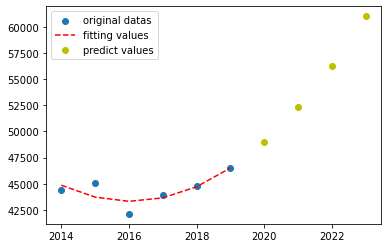

In [55]:
#画某个地区的拟合图
x=np.arange(1,len(income_postcode.columns))
y=income_postcode.iloc[i,1:]
model=np.polyfit(x,y,k)
fit=np.poly1d(model)
fit_value=fit(x)
pred=fit(pred_x)
plt.scatter(range(2014,2020),y,marker='o',label='original datas')#对原始数据画散点图
plt.plot(range(2014,2020),fit_value,ls='--',c='red',label='fitting values')#对拟合之后的数据画图
plt.plot(range(2020,2024),pred,'o',c='y',label='predict values')#对预测数据画图
plt.legend()